# Denver Coffee Shop (08/19/2022)

## Where to open a new coffee shop?

### 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

### 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

### 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

## 💡 My Idea

If we are interested in the population of ages 20-35, we are most interested in neighborhoods with a higher population of this range (maybe person per sq area) and also with the most money to spend. Since we don't compete with Starbucks, we can possibly mimic a location selection strategy to Starbucks. To start simple, let's just find the neighborhoods with the highest age 20-35 population, and then subsort by salary.


In [72]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon

denver = pd.read_csv('./data/denver.csv')
den_df = pd.DataFrame(denver)
den_df.head()

StoreNumber                            Name   PhoneNumber  \
0  27708-240564  Auraria Tivoli - Student Union    3035563700   
1   75828-94910              Grand Hyatt Denver  303-295-1234   
2   74105-23807          Safeway - Denver #1463  303-722-6117   
3  22871-102491          Safeway - Denver #1248  303-477-5091   
4  11105-100844        Highlands Garden Village  303-455-3382   

               Street1 Street2 Street3  PostalCode  Longitude  Latitude  
0  900 Auraria Parkway     NaN     NaN       80204    -105.01     39.75  
1       1740 Welton St     NaN     NaN   802023940    -104.99     39.75  
2       2150 S Downing     NaN     NaN   802104528    -104.97     39.68  
3    2660 Federal Blvd     NaN     NaN       80211    -105.02     39.76  
4      4500 W 38th Ave     NaN     NaN   802122001    -105.05     39.77

In [54]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
n_gdf = gpd.GeoDataFrame(neighborhoods)
n_gdf.head()

NBHD_ID             NBHD_NAME  \
0        2               Auraria   
1       21        Cory - Merrill   
2        7               Belcaro   
3       70       Washington Park   
4       71  Washington Park West   

                                            geometry  
0  POLYGON ((-105.00042 39.74552, -105.00041 39.7...  
1  POLYGON ((-104.94070 39.69540, -104.94070 39.6...  
2  POLYGON ((-104.94070 39.71156, -104.94069 39.7...  
3  POLYGON ((-104.95931 39.71566, -104.95931 39.7...  
4  POLYGON ((-104.97342 39.68982, -104.97356 39.6...

In [53]:
ppl = pd.read_csv('./data/census.csv')
ppl_df = pd.DataFrame(ppl)
ppl_df.head()

NBHD_ID    NBHD_NAME  POPULATION_2010  AGE_LESS_18  AGE_18_TO_34  \
0        1  Athmar Park           8898.0       2649.0        2406.0   
1        2      Auraria            705.0          7.0         635.0   
2        3        Baker           4879.0        745.0        1762.0   
3        4       Barnum           6111.0       2015.0        1647.0   
4        5  Barnum West           5376.0       1579.0        1380.0   

   AGE_35_TO_65  AGE_65_PLUS  NUM_HOUSEHOLDS  FAMILIES  NUM_HHLD_100K+  
0        3112.0        731.0          2781.0    1964.0           425.0  
1          57.0          6.0            60.0      15.0             NaN  
2        2037.0        335.0          2447.0     833.0             NaN  
3        2089.0        360.0          1782.0    1289.0           120.0  
4        1824.0        593.0          1704.0    1207.0             NaN

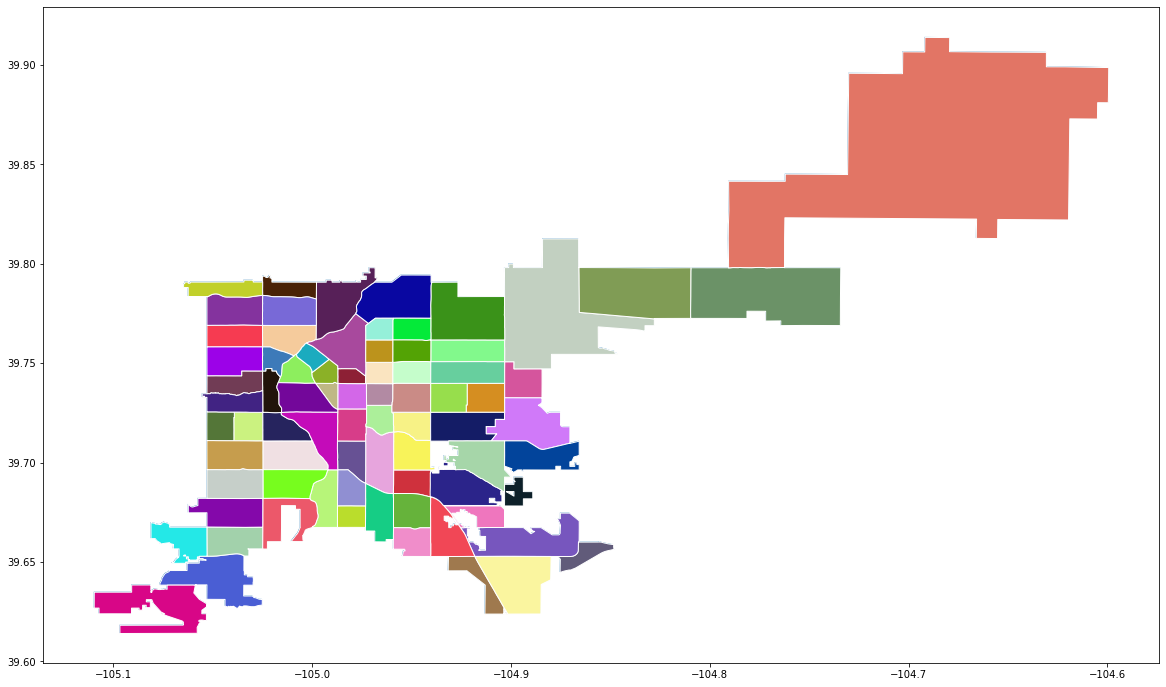

In [74]:
nh_names = n_gdf["NBHD_NAME"]
base = neighborhoods.plot(legend=True,figsize=(20, 20))
for nh in (nh_names):
    neighborhoods.loc[neighborhoods["NBHD_NAME"].eq(nh)].plot(color=np.random.rand(3,), edgecolor="white", ax=base)

#geo_points = [Point(xy) for xy in zip( ppl_df["Longitude"], ppl_df["Latitude"])]
#geometry[:3]